In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

N = 300
rho = 0.25
L = np.sqrt(N/rho)
L2 = L/2

apical = 5*np.pi/12
d1 = 2/3*np.cos(apical/2)
d2 = np.sqrt((1/3*np.cos(apical/2))**2 + np.sin(apical/2)**2)
dtheta = np.pi/2 + np.arctan2(np.cos(apical/2)/3, np.sin(apical/2))

In [2]:
def load_file(filename, N):
    data = np.fromfile(filename, dtype=np.float64)
    assert data.size % N == 0, "File size does not match expected number of molecules"
    num_frames = data.size // N
    return data.reshape((num_frames, N))  # shape: (frames, molecules)
with open('/users/lli190/scratch/MD_full_trajectories/Outputs/' + '300long_0.39T' +'_KE.txt', 'r') as file: 
    KE = [float(line.rstrip()) for line in file]
with open('/users/lli190/scratch/MD_full_trajectories/Outputs/' +'300long_0.39T' +'_PE.txt', 'r') as file: 
    PE = [float(line.rstrip()) for line in file]
KE = np.array(KE)
PE = np.array(PE)


In [3]:
T = np.mean(KE[-1000000:]/N*2/3)
T

0.3997520208177778

In [4]:
x_COM = load_file('/users/lli190/scratch/MD_analyzed_trajectories/saved_outputs/300long_0.39T_x_COM.bin', N)
y_COM = load_file('/users/lli190/scratch/MD_analyzed_trajectories/saved_outputs/300long_0.39T_y_COM.bin', N)
theta = load_file('/users/lli190/scratch/MD_analyzed_trajectories/saved_outputs/300long_0.39T_theta.bin', N)

In [21]:
x_COM = np.array(x_COM)
y_COM = np.array(y_COM)
theta = np.array(theta)

In [5]:
x1 = x_COM + d1*np.sin(theta)
y1 = y_COM + d1*np.cos(theta)
x3 = x_COM + d2*np.sin(theta + dtheta)
y3 = y_COM + d2*np.cos(theta + dtheta)
x2 = x_COM + d2*np.sin(theta - dtheta)
y2 = y_COM + d2*np.cos(theta - dtheta)

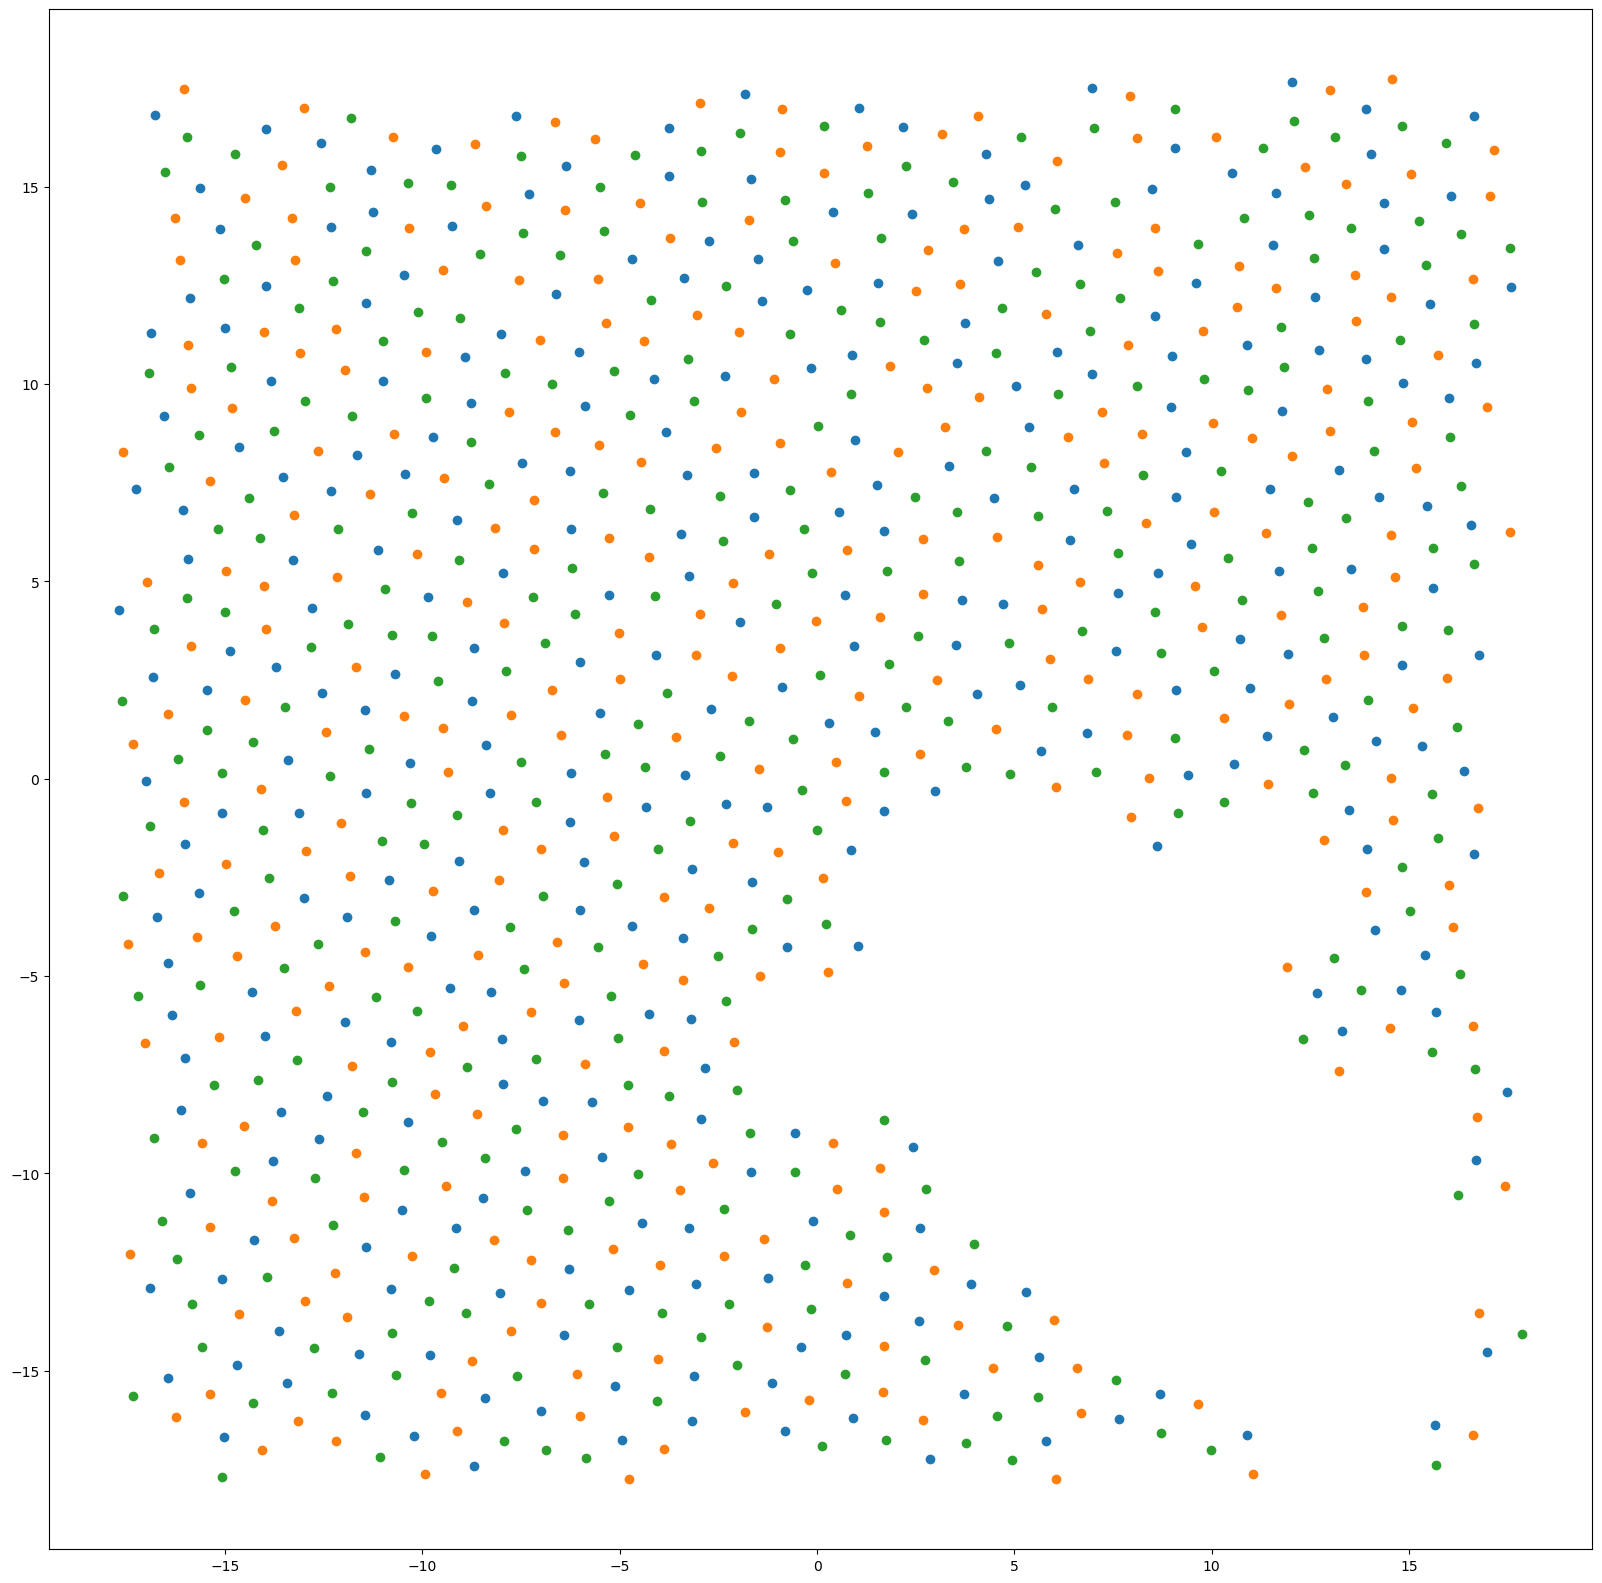

In [6]:
##### 
frame = -1
#####

x1_ = x1[frame]
x3_ = x2[frame]
x2_ = x3[frame]
y1_ = y1[frame]
y3_ = y2[frame]
y2_ = y3[frame]

plt.figure(figsize = (20,20))
plt.scatter(x1_, y1_)
plt.scatter(x2_, y2_)
plt.scatter(x3_, y3_)
ax = plt.gca()
ax.set_aspect('equal')

In [9]:
x1.shape

(3000000, 300)

In [217]:
## Compute n^

def n_hat(m):
    Q_1 = np.sum(np.cos(np.abs(theta*m)), axis = 1)/N
    Q_2 = np.sum(np.sin(np.abs(theta*m)), axis = 1)/N
    theta0 = np.arctan2(Q_1, Q_2)
    return np.cos(m/2*theta0), np.sin(m/2*theta0)
n_6 = n_hat(6)

In [218]:
n_6 = np.array(n_6)
n_6.shape

(2, 1000000)

In [219]:
n_6[:,-1].shape
ref_angle = np.arctan2(n_6[1, t], n_6[0, t])  

In [195]:
def assign_sixfold_colors(theta, n_6, t):
    ref_angle = np.arctan2(n_6[1, t], n_6[0, t])  
    ref_angle=(ref_angle+2*np.pi)%(np.pi*2)
    theta_ = theta[t]
    dtheta=np.abs((theta_-ref_angle))
    indices = (np.rint(dtheta/(np.pi/3))%3).astype(int)
    return indices
indices = assign_sixfold_colors(theta, n_6, t=-1)

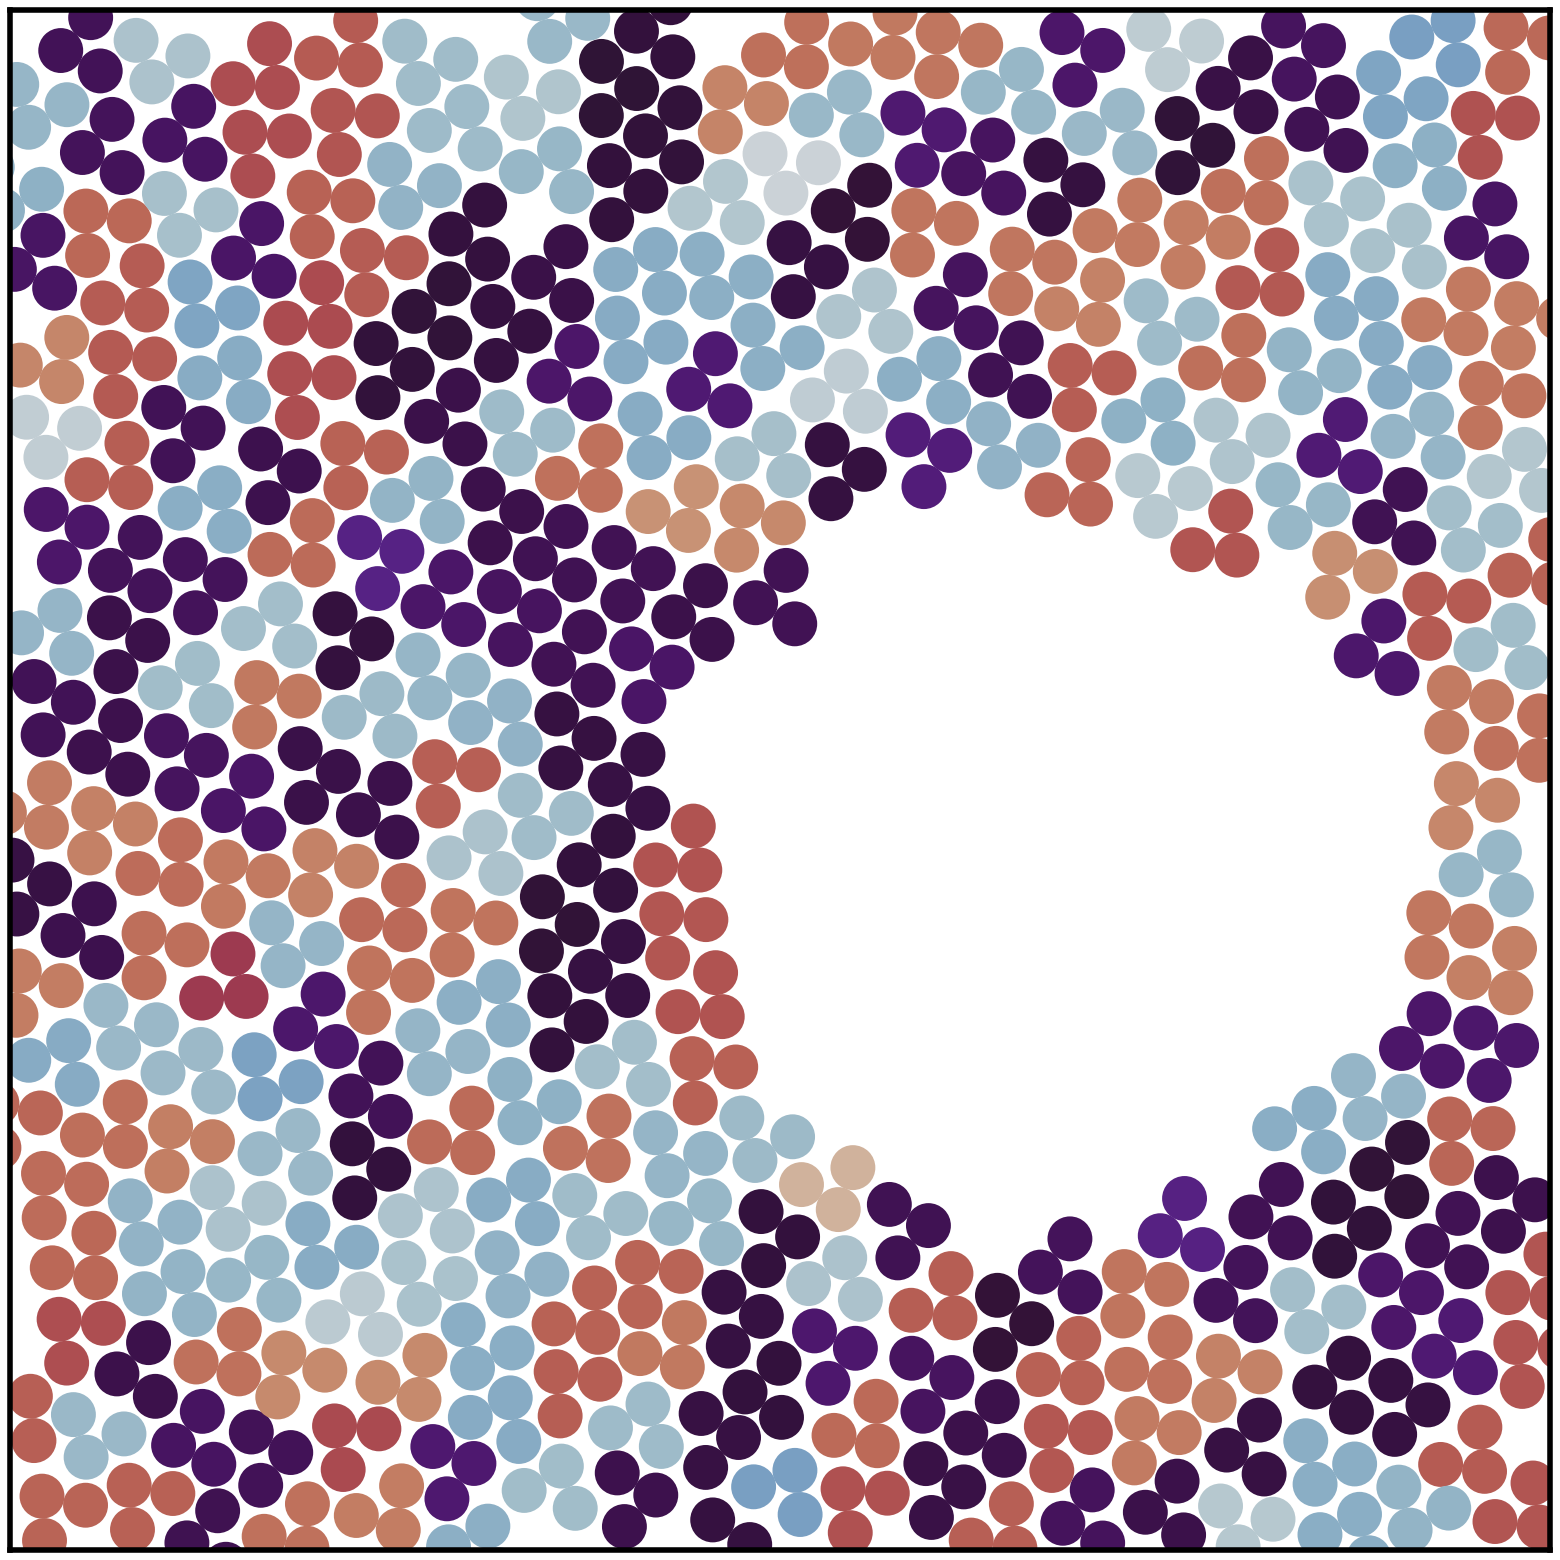

In [103]:
#########
t = -1
ss = 860 #250 for 768
arrows_x = 7
arrows_y = -1


#########

plt.figure(figsize=(20, 20))


theta__ = np.mod(theta[t] + np.pi, 2 * np.pi) %np.pi
theta_normed = theta__ / ( np.pi) 
cols = plt.cm.twilight(theta_normed)  
ecols = cols
alph = 1

plt.scatter(x1_, y1_, color = cols, s = ss, alpha = alph, edgecolors = ecols, linewidth = 3)
plt.scatter(x2_, y2_, color = cols, s = ss, alpha = alph, edgecolors = ecols, linewidth = 3)
plt.scatter(x3_, y3_, color = cols, s = ss, alpha = alph, edgecolors = ecols, linewidth = 3)


def quiver_with_outline(ax, x, y, u, v, scale, color, outline_color='k', outline_width=10):
    ax.quiver(x, y, u, v, scale=scale, color=outline_color, linewidths=3.0, zorder=0)
   

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(4)
plt.xlim(-L2, L2)
plt.ylim(-L2, L2)

def rotate(x, y, alpha):
    return (
        x * np.cos(alpha) + y * np.sin(alpha),
        -x * np.sin(alpha) + y * np.cos(alpha)
    )

angles = [0, np.pi/3, 2*np.pi/3]
color_order = [2, 0, 1]
ax.tick_params(
    axis='both',        # apply to both axes
    which='both',       # apply to major and minor ticks
    bottom=False, top=False, left=False, right=False,
    labelbottom=False, labelleft=False
)

ax.set_aspect('equal')
# plt.axis('off') 
# plt.savefig('/users/lli190/MolecularDynamics/poster_full_0.23_300.svg')
plt.show()


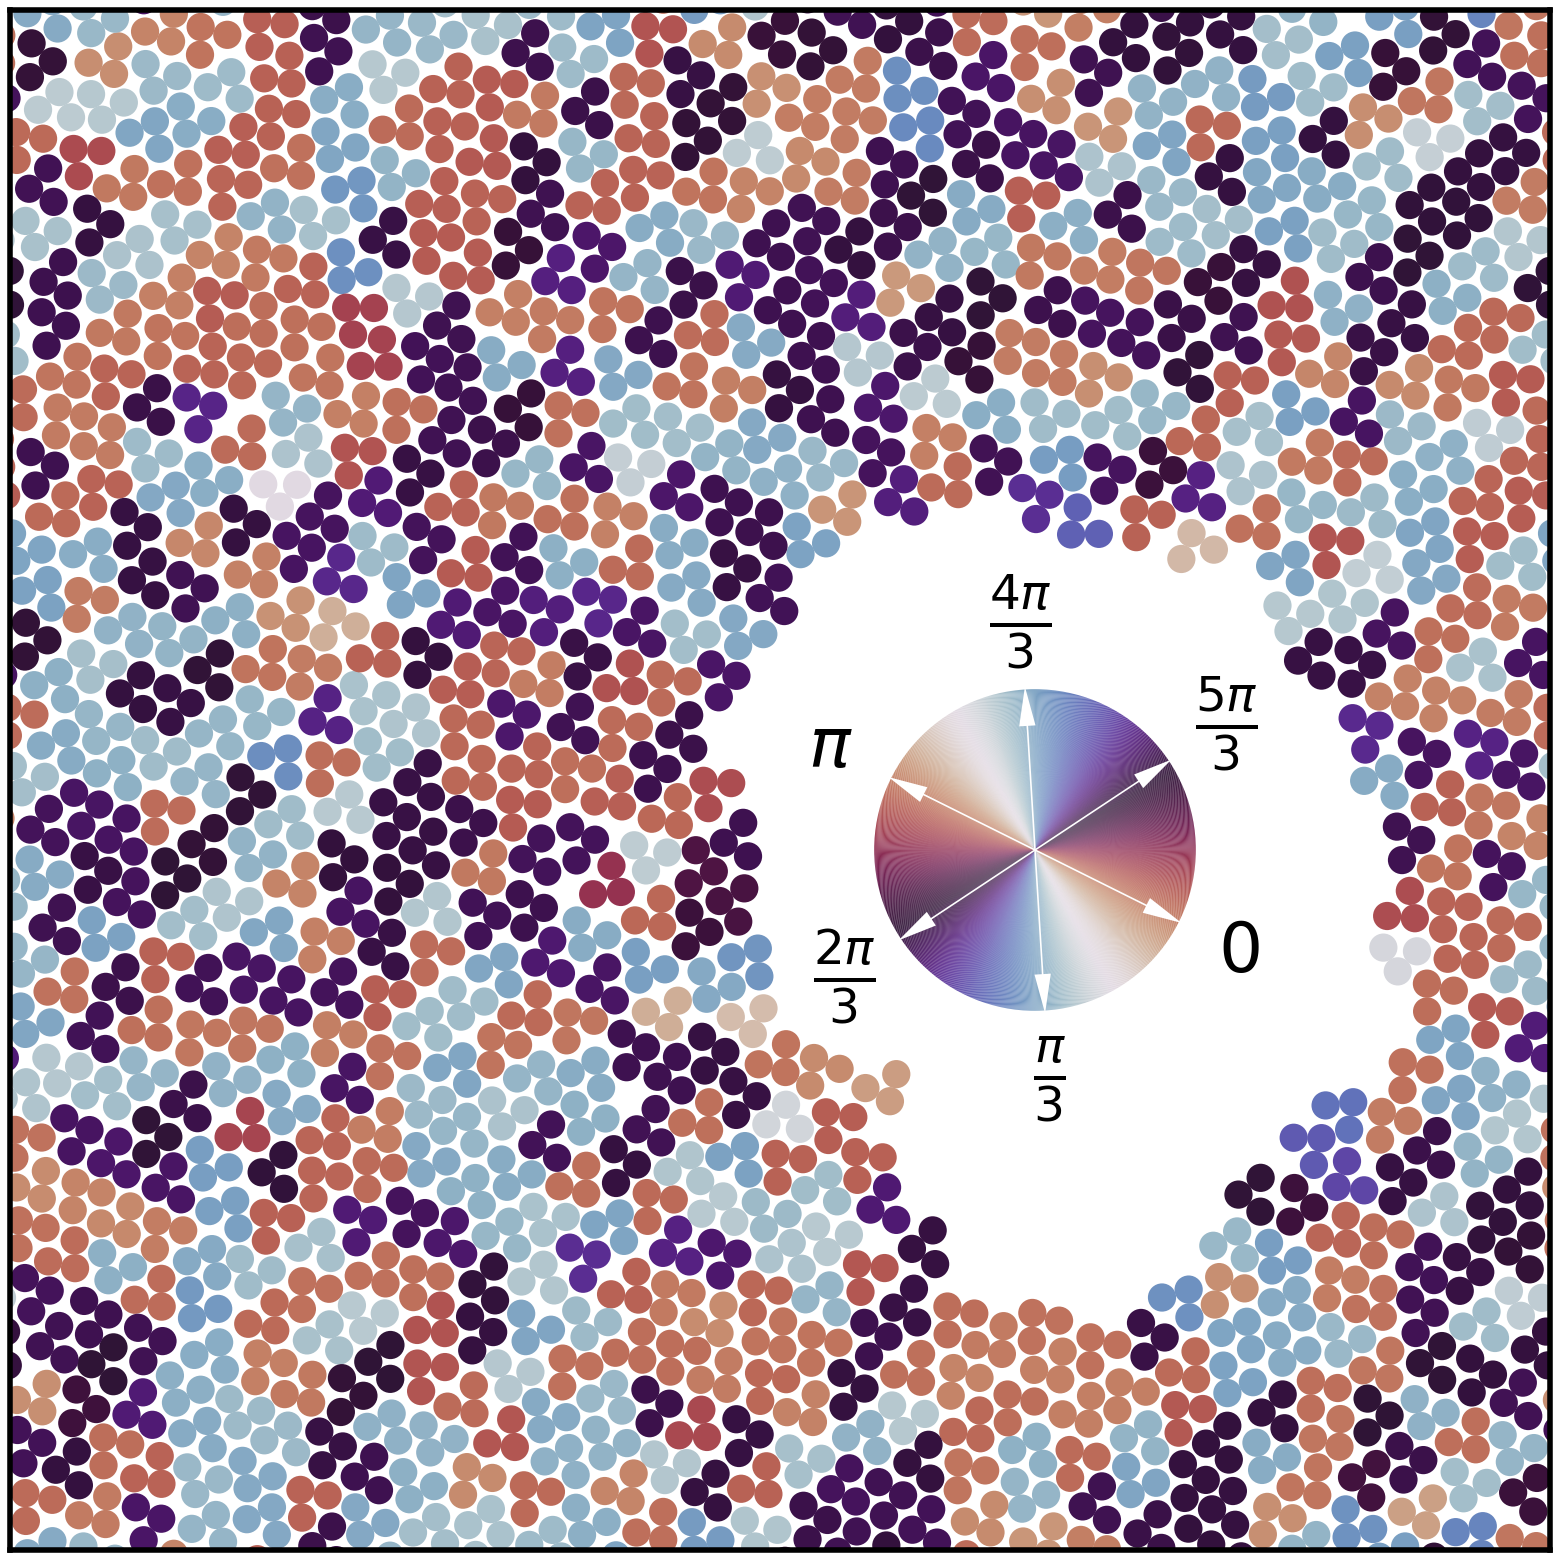

In [235]:
#########
t = -1
ss = 300
arrows_x = 7
arrows_y = -7.5
#########

import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 20))

rangle = np.arctan2(ny, nx)  

theta__ = theta[t]
theta_normed = ((theta__ + np.pi)%np.pi)/(np.pi)
cols = plt.cm.twilight(theta_normed)
ecols = cols
alph = 1.0

ax.scatter(x1_, y1_, color=cols, s=ss, alpha=alph, edgecolors=ecols, linewidth=3)
ax.scatter(x2_, y2_, color=cols, s=ss, alpha=alph, edgecolors=ecols, linewidth=3)
ax.scatter(x3_, y3_, color=cols, s=ss, alpha=alph, edgecolors=ecols, linewidth=3)
ax.scatter(x1_+L, y1_, color=cols, s=ss, alpha=alph, edgecolors=ecols, linewidth=3)
ax.scatter(x2_+L, y2_, color=cols, s=ss, alpha=alph, edgecolors=ecols, linewidth=3)
ax.scatter(x3_+L, y3_, color=cols, s=ss, alpha=alph, edgecolors=ecols, linewidth=3)
ax.scatter(x1_+L, y1_+L, color=cols, s=ss, alpha=alph, edgecolors=ecols, linewidth=3)
ax.scatter(x2_+L, y2_+L, color=cols, s=ss, alpha=alph, edgecolors=ecols, linewidth=3)
ax.scatter(x3_+L, y3_+L, color=cols, s=ss, alpha=alph, edgecolors=ecols, linewidth=3)
ax.scatter(x1_-L, y1_, color=cols, s=ss, alpha=alph, edgecolors=ecols, linewidth=3)
ax.scatter(x2_-L, y2_, color=cols, s=ss, alpha=alph, edgecolors=ecols, linewidth=3)
ax.scatter(x3_-L, y3_, color=cols, s=ss, alpha=alph, edgecolors=ecols, linewidth=3)
ax.scatter(x1_-L, y1_+L, color=cols, s=ss, alpha=alph, edgecolors=ecols, linewidth=3)
ax.scatter(x2_-L, y2_+L, color=cols, s=ss, alpha=alph, edgecolors=ecols, linewidth=3)
ax.scatter(x3_-L, y3_+L, color=cols, s=ss, alpha=alph, edgecolors=ecols, linewidth=3)
ax.scatter(x1_, y1_+L, color=cols, s=ss, alpha=alph, edgecolors=ecols, linewidth=3)
ax.scatter(x2_, y2_+L, color=cols, s=ss, alpha=alph, edgecolors=ecols, linewidth=3)
ax.scatter(x3_, y3_+L, color=cols, s=ss, alpha=alph, edgecolors=ecols, linewidth=3)
ax.scatter(x1_+L, y1_-L, color=cols, s=ss, alpha=alph, edgecolors=ecols, linewidth=3)
ax.scatter(x2_+L, y2_-L, color=cols, s=ss, alpha=alph, edgecolors=ecols, linewidth=3)
ax.scatter(x3_+L, y3_-L, color=cols, s=ss, alpha=alph, edgecolors=ecols, linewidth=3)
ax.scatter(x1_-L, y1_-L, color=cols, s=ss, alpha=alph, edgecolors=ecols, linewidth=3)
ax.scatter(x2_-L, y2_-L, color=cols, s=ss, alpha=alph, edgecolors=ecols, linewidth=3)
ax.scatter(x3_-L, y3_-L, color=cols, s=ss, alpha=alph, edgecolors=ecols, linewidth=3)
ax.scatter(x1_, y1_-L, color=cols, s=ss, alpha=alph, edgecolors=ecols, linewidth=3)
ax.scatter(x2_, y2_-L, color=cols, s=ss, alpha=alph, edgecolors=ecols, linewidth=3)
ax.scatter(x3_, y3_-L, color=cols, s=ss, alpha=alph, edgecolors=ecols, linewidth=3)
# === Styling ===
ax.tick_params(axis='both', which='both', bottom=False, top=False,
               left=False, right=False, labelbottom=False, labelleft=False)
for spine in ax.spines.values():
    spine.set_linewidth(4)

plt.xlim(-L2, L2)
plt.ylim(-L2, L2)
ax.set_aspect('equal')

nx, ny = n_6[0, t], n_6[1, t]

inset_ax = fig.add_axes([0.55, 0.37, 0.18, 0.18])

n = 1000
thetaw = np.linspace(0, 2 * np.pi, n)
x = np.cos(thetaw+rangle)
y = -np.sin(thetaw+rangle)  

norm_theta = np.mod(thetaw + rangle-np.pi/3, np.pi) / np.pi
colorw = plt.cm.twilight(norm_theta)

for i in range(n - 1):
    inset_ax.fill([0, x[i], x[i + 1]],[0, y[i], y[i + 1]],  color=colorw[i], edgecolor='none', alpha=1.0)

inset_ax.fill([0, x[-1], x[0]], [0, y[-1], y[0]], color=colorw[-1],edgecolor='none' alpha=1.0)

inset_ax.set_aspect('equal')
inset_ax.set_xticks([])
inset_ax.set_yticks([])
inset_ax.axis('off')

inset_ax.add_patch(plt.Circle((0, 0), 1.0, color='w', fill=False, linewidth=4, zorder=10))

for i in range(6):
    angle = -i * np.pi / 3
    angle_rotated = (angle-rangle +np.pi/4) % (2 * np.pi)
    x_text = 1.4 * np.cos(angle_rotated)
    y_text = 1.4 * np.sin(angle_rotated) 

    if i == 0:
        label = "0"
        
    elif i == 1: 
        label = r"$\frac{\pi}{3}$"
    elif i == 3:
        label = r"$\pi$"
    else:
        label = fr"$\frac{{{i}\pi}}{{3}}$"

    inset_ax.text(x_text, y_text, label,
                  ha='center', va='center',
                  fontsize=50)

    inset_ax.arrow(0, 0,
                   arrow_length * np.cos(angle_rotated),
                   arrow_length * np.sin(angle_rotated),
                   width=0.01,
                   head_width=0.1,
                   head_length=0.24,
                   fc='w', ec='w', linewidth=0, zorder=6,
                   length_includes_head=True)


# plt.savefig('/users/lli190/MolecularDynamics/poster_full_0.23_300.svg')
plt.show()


In [8]:
def unwrap_positions(x_mod):
    dx = np.diff(x_mod, axis=0)                    
    dx = np.where(dx >  L/2, dx - L, dx)
    dx = np.where(dx < -L/2, dx + L, dx)
    x_unwrapped = np.zeros_like(x_mod)
    x_unwrapped[0] = x_mod[0]                     
    x_unwrapped[1:] = x_unwrapped[0] + np.cumsum(dx, axis=0)
    return x_unwrapped
def unwrap_angles(theta):
    dtheta = np.diff(theta, axis=0)
    dtheta = (dtheta + np.pi) % (2 * np.pi) - np.pi  # brings to (-π, π]
    theta_unwrapped = np.zeros_like(theta)
    theta_unwrapped[0] = theta[0]
    theta_unwrapped[1:] = theta_unwrapped[0] + np.cumsum(dtheta, axis=0)
    return theta_unwrapped


In [9]:
x_unwrapped = unwrap_positions(x_COM[-1000000:])
y_unwrapped = unwrap_positions(y_COM[-1000000:])

In [10]:
def normalize(arr):
    return (arr - np.min(arr))/(np.max(arr)-np.min(arr))


In [11]:
total_disp =np.sqrt( (x_unwrapped[-1,:]-x_unwrapped[0,:])**2 + (y_unwrapped[-1,:]-y_unwrapped[0,:])**2)
norm = normalize(total_disp)
norm

array([0.12063324, 0.11398058, 0.59125182, 0.11835457, 0.1170173 ,
       0.1412545 , 0.04765433, 0.12067632, 0.12266741, 0.12161139,
       0.2333917 , 0.04849982, 0.13121976, 0.08795099, 0.12579342,
       0.09506546, 0.11787788, 0.1117777 , 0.12487906, 0.11551169,
       0.10790951, 0.11455344, 0.3588042 , 0.17643622, 0.12057291,
       0.08470355, 0.27128421, 0.11984868, 0.11493455, 0.17661868,
       0.11591054, 0.84968058, 0.13236614, 0.13260804, 0.11811734,
       0.17868894, 0.17273505, 0.13946931, 0.12833875, 0.02749595,
       0.16910243, 0.17086495, 0.59701436, 0.12502166, 0.12849243,
       0.05268497, 0.12094899, 0.23020099, 0.10629398, 0.01562229,
       0.16465398, 0.1129753 , 0.10943611, 0.07592015, 0.23545166,
       0.12288844, 0.16319403, 0.11107725, 0.10502804, 0.16407987,
       0.70581878, 0.13845077, 0.12584506, 0.11555422, 0.16381175,
       0.11579834, 0.11629689, 0.38733174, 0.13199414, 0.12961191,
       0.15743853, 0.1402811 , 0.11769433, 0.62635969, 0.11456

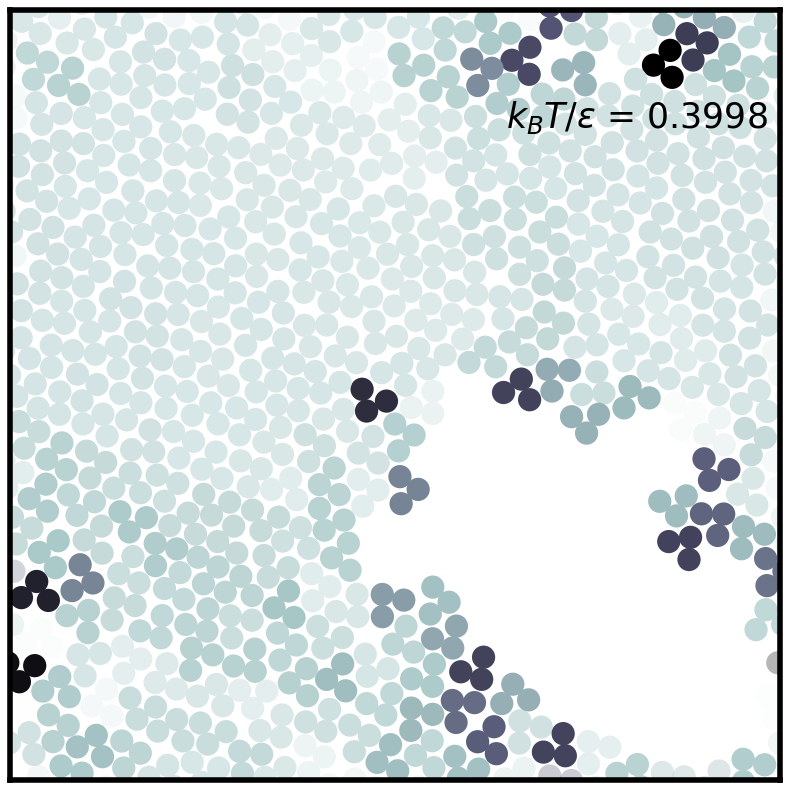

In [13]:
import cmcrameri.cm as cmc

f = -1
x1_ = x1[f]
x3_ = x2[f]
x2_ = x3[f]
y1_ = y1[f]
y3_ = y2[f]
y2_ = y3[f]
#########################
t = -1
ss = 280
arrows_x = 7
arrows_y = -7.5
alph2 = 0.3

import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

cols = plt.cm.bone_r(norm)
ecols = 'none'
alph = 1.0

ax.scatter(x1_, y1_, color=cols, s=ss, alpha=alph, edgecolors=ecols, linewidth=3)
ax.scatter(x2_, y2_, color=cols, s=ss, alpha=alph, edgecolors=ecols, linewidth=3)
ax.scatter(x3_, y3_, color=cols, s=ss, alpha=alph, edgecolors=ecols, linewidth=3)
ax.scatter(x1_+L, y1_, color=cols, s=ss, alpha=alph2, edgecolors=ecols, linewidth=3)
ax.scatter(x2_+L, y2_, color=cols, s=ss, alpha=alph2, edgecolors=ecols, linewidth=3)
ax.scatter(x3_+L, y3_, color=cols, s=ss, alpha=alph2, edgecolors=ecols, linewidth=3)
ax.scatter(x1_+L, y1_+L, color=cols, s=ss, alpha=alph2, edgecolors=ecols, linewidth=3)
ax.scatter(x2_+L, y2_+L, color=cols, s=ss, alpha=alph2, edgecolors=ecols, linewidth=3)
ax.scatter(x3_+L, y3_+L, color=cols, s=ss, alpha=alph2, edgecolors=ecols, linewidth=3)
ax.scatter(x1_-L, y1_, color=cols, s=ss, alpha=alph2, edgecolors=ecols, linewidth=3)
ax.scatter(x2_-L, y2_, color=cols, s=ss, alpha=alph2, edgecolors=ecols, linewidth=3)
ax.scatter(x3_-L, y3_, color=cols, s=ss, alpha=alph2, edgecolors=ecols, linewidth=3)
ax.scatter(x1_-L, y1_+L, color=cols, s=ss, alpha=alph2, edgecolors=ecols, linewidth=3)
ax.scatter(x2_-L, y2_+L, color=cols, s=ss, alpha=alph2, edgecolors=ecols, linewidth=3)
ax.scatter(x3_-L, y3_+L, color=cols, s=ss, alpha=alph2, edgecolors=ecols, linewidth=3)
ax.scatter(x1_, y1_+L, color=cols, s=ss, alpha=alph2, edgecolors=ecols, linewidth=3)
ax.scatter(x2_, y2_+L, color=cols, s=ss, alpha=alph2, edgecolors=ecols, linewidth=3)
ax.scatter(x3_, y3_+L, color=cols, s=ss, alpha=alph2, edgecolors=ecols, linewidth=3)
ax.scatter(x1_+L, y1_-L, color=cols, s=ss, alpha=alph2, edgecolors=ecols, linewidth=3)
ax.scatter(x2_+L, y2_-L, color=cols, s=ss, alpha=alph2, edgecolors=ecols, linewidth=3)
ax.scatter(x3_+L, y3_-L, color=cols, s=ss, alpha=alph2, edgecolors=ecols, linewidth=3)
ax.scatter(x1_-L, y1_-L, color=cols, s=ss, alpha=alph2, edgecolors=ecols, linewidth=3)
ax.scatter(x2_-L, y2_-L, color=cols, s=ss, alpha=alph2, edgecolors=ecols, linewidth=3)
ax.scatter(x3_-L, y3_-L, color=cols, s=ss, alpha=alph2, edgecolors=ecols, linewidth=3)
ax.scatter(x1_, y1_-L, color=cols, s=ss, alpha=alph2, edgecolors=ecols, linewidth=3)
ax.scatter(x2_, y2_-L, color=cols, s=ss, alpha=alph2, edgecolors=ecols, linewidth=3)
ax.scatter(x3_, y3_-L, color=cols, s=ss, alpha=alph2, edgecolors=ecols, linewidth=3)
ax.tick_params(axis='both', which='both', bottom=False, top=False,
               left=False, right=False, labelbottom=False, labelleft=False)
for spine in ax.spines.values():
    spine.set_linewidth(4)
    
ax.text(5, 12, f'$k_BT/\\epsilon$ = {T:.4f}', fontsize = 25)

plt.xlim(-L2, L2)
plt.ylim(-L2, L2)
ax.set_aspect('equal')

plt.savefig('/users/lli190/MolecularDynamics/displacement_0.39.svg')
plt.show()